# Dynamic Web Scraping

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import pandas as pd
import time
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

### Initialize web driver

In [2]:
driver = webdriver.Chrome('usr/local/bin/chromedriver')
driver.implicitly_wait(15)
driver.maximize_window()

In [3]:
url_ee = "https://www.finnomena.com/stock/EE"
driver.get(url_ee)
print(driver.title)

หุ้น EE งบการเงิน 10 ปี พร้อมกราฟ - FINNOMENA


# Scraping Stocks

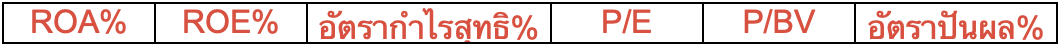

#### Total Quarters

In [4]:
Q_XPATH = '//*[@id="stock-financial-ratio"]/div/div/div/div/div[2]/div[2]/div/div[1]/div[@class="year"]'
q_elements = driver.find_elements(By.XPATH, Q_XPATH)
# Check the number of elements
print(len(q_elements))
# Convert the elements into list of text
q_list = [element.text for element in q_elements]
print(q_list)

41
['1Q2556', '2Q2556', '3Q2556', '4Q2556', '1Q2557', '2Q2557', '3Q2557', '4Q2557', '1Q2558', '2Q2558', '3Q2558', '4Q2558', '1Q2559', '2Q2559', '3Q2559', '4Q2559', '1Q2560', '2Q2560', '3Q2560', '4Q2560', '1Q2561', '2Q2561', '3Q2561', '4Q2561', '1Q2562', '2Q2562', '3Q2562', '4Q2562', '1Q2563', '2Q2563', '3Q2563', '4Q2563', '1Q2564', '2Q2564', '3Q2564', '4Q2564', '1Q2565', '2Q2565', '3Q2565', '4Q2565', '3/3/2566']


In [6]:
table1_index = get_index_table_1("4Q2565")
print(table1_index)
table2_index = get_index_table_2("4Q2565")
print(table2_index)

39
39


#### ROA%

In [7]:
ROA_XPATH = '//*[@id="stock-financial-ratio"]/div/div/div/div/div[2]/div[2]/div/div[2]/div[@class="data-each"]'
roa_elements = driver.find_elements(By.XPATH, ROA_XPATH)
# Check the number of elements
print(len(roa_elements))
# Convert the elements into list of text
roa_list = [element.text for element in roa_elements]
print(roa_list)
print(roa_list[table1_index])

41
['0.10', '-0.18', '0.21', '0.63', '0.40', '0.00', '0.14', '-0.52', '-0.70', '-0.63', '-2.37', '-3.10', '0.35', '-0.51', '-6.44', '-4.00', '0.57', '0.48', '0.51', '1.84', '2.89', '-1.80', '1.99', '0.83', '1.55', '2.14', '1.15', '1.09', '-1.84', '2.56', '-2.64', '2.25', '0.76', '8.47', '1.79', '0.60', '-0.96', '-1.24', '-0.71', '-1.65', '']
-1.65


#### ROE%

In [8]:
ROE_XPATH = '//*[@id="stock-financial-ratio"]/div/div/div/div/div[2]/div[2]/div/div[3]/div[@class="data-each"]'
roe_elements = driver.find_elements(By.XPATH, ROE_XPATH)
# Check the number of elements
print(len(roe_elements))
# Convert the elements into list of text
roe_list = [element.text for element in roe_elements]
print(roe_list)
print(roe_list[table1_index])

41
['0.10', '-0.18', '0.21', '0.64', '0.40', '0.00', '0.14', '-0.52', '-0.71', '-0.63', '-2.38', '-3.11', '0.35', '-0.52', '-6.46', '-4.01', '0.58', '0.49', '0.52', '1.87', '2.97', '-1.87', '2.08', '0.89', '1.67', '2.32', '1.25', '1.19', '-2.01', '2.83', '-2.93', '2.50', '0.84', '9.08', '1.88', '0.63', '-0.99', '-1.26', '-0.71', '-1.66', '']
-1.66


#### อัตรากำไรสุทธิ%

In [9]:
PROFIT_RATIO_XPATH = '//*[@id="stock-financial-ratio"]/div/div/div/div/div[2]/div[2]/div/div[6]/div[@class="data-each"]'
profit_ratio_elements = driver.find_elements(By.XPATH, PROFIT_RATIO_XPATH)
# Check the number of elements
print(len(profit_ratio_elements))
# Convert the elements into list of text
profit_ratio_list = [element.text for element in profit_ratio_elements]
print(profit_ratio_list)
print(profit_ratio_list[table1_index])

41
['16.88', '-29.20', '31.55', '51.17', '44.61', '0.53', '17.50', '-152.18', '-409.44', '-472.75', '-814.71', '-3,898.36', '459.81', '-2,748.56', '-5,128.43', '-7,479.00', '1,169.71', '2,515.53', '280.92', '840.80', '5,281.32', '-1,938.32', '673.38', '130.17', '1,755.74', '6,188.17', '766.84', '1,297.90', '-1,811.00', '5,173.35', '-1,609.30', '7,975.28', '1,120.39', '130.32', '33.93', '-12.42', '-1,427.17', '17,294.16', '-167.44', '-472.55', '']
-472.55


#### P/E

In [10]:
PE_XPATH = '//*[@id="stock-statistics"]/div/div/div/div/div[2]/div[2]/div/div[4]/div[@class="data-each"]'
pe_elements = driver.find_elements(By.XPATH, PE_XPATH)
# Check the number of elements
print(len(pe_elements))
# Convert the elements into list of text
pe_list = [element.text for element in pe_elements]
print(pe_list)
print(pe_list[table2_index])

41
['55.90', '42.12', '36.42', '33.70', '229.82', '200.16', '174.73', '211.50', '11,970.47', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', '41.62', '24.84', '41.32', '24.96', '28.12', '37.52', '16.87', '18.20', '', '32.74', '43.97', 'N/A', '440.25', '63.75', '31.80', '20.87', '', '25.00', '597.68', 'N/A', 'N/A']
N/A


#### P/BV

In [11]:
PBV_XPATH = '//*[@id="stock-statistics"]/div/div/div/div/div[2]/div[2]/div/div[5]/div[@class="data-each"]'
pbv_elements = driver.find_elements(By.XPATH, PBV_XPATH)
# Check the number of elements
print(len(pbv_elements))
# Convert the elements into list of text
pbv_list = [element.text for element in pbv_elements]
print(pbv_list)
print(pbv_list[table2_index])

41
['2.27', '1.78', '1.46', '1.35', '1.75', '2.12', '2.17', '2.47', '2.25', '2.11', '1.90', '1.88', '1.95', '1.99', '2.00', '2.25', '2.77', '2.52', '2.19', '1.83', '1.41', '1.41', '1.42', '1.23', '1.12', '1.02', '1.13', '1.08', '', '0.95', '1.44', '1.24', '1.51', '2.02', '2.89', '2.70', '', '2.46', '2.13', '2.07', '1.94']
2.07


#### อัตราปันผล

In [12]:
DIV_YIELD_XPATH = '//*[@id="stock-statistics"]/div/div/div/div/div[2]/div[2]/div/div[7]/div[@class="data-each"]'
div_yield_elements = driver.find_elements(By.XPATH, DIV_YIELD_XPATH)
# Check the number of elements
print(len(div_yield_elements))
# Convert the elements into list of text
div_yield_list = [element.text for element in div_yield_elements]
print(div_yield_list)
print(div_yield_list[table2_index])

41
['0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00']
0.00


In [13]:
print(f"Roa : {get_roa(table1_index)}")
print(f"Roe : {get_roe(table1_index)}")
print(f"Profit ratio : {get_profit_ratio(table1_index)}")
print(f"P/E : {get_pe(table2_index)}")
print(f"P/BV : {get_pbv(table2_index)}")
print(f"Divident yield : {get_div_yield(table2_index)}")

Roa : -1.65
Roe : -1.66
Profit ratio : -472.55
P/E : N/A
P/BV : 2.07
Divident yield : 0.00


In [14]:
def get_index_table_1(Quarter):
    try:
        INDEX_TABLE_1_XPATH = '//*[@id="stock-financial-ratio"]/div/div/div/div/div[2]/div[2]/div/div[1]/div[@class="year"]'
        index_table_1_elements = driver.find_elements(By.XPATH, INDEX_TABLE_1_XPATH)
        # Convert the elements into list of text
        index_table_1_list = [element.text for element in index_table_1_elements]
        quater_index = index_table_1_list.index(Quarter)
        return quater_index
    except:
        return -1

def get_index_table_2(Quarter):
    try:
        INDEX_TABLE_2_XPATH = '//*[@id="stock-statistics"]/div/div/div/div/div[2]/div[2]/div/div[1]/div[@class="year"]'
        index_table_2_elements = driver.find_elements(By.XPATH, INDEX_TABLE_2_XPATH)
        # Convert the elements into list of text
        index_table_2_list = [element.text for element in index_table_2_elements]
        quater_index = index_table_2_list.index(Quarter)
        return quater_index
    except:
        return -1

def is_40Quarter():
    try:
        Q_XPATH = '//*[@id="stock-financial-ratio"]/div/div/div/div/div[2]/div[2]/div/div[1]/div[@class="year"]'
        q_elements = driver.find_elements(By.XPATH, Q_XPATH)
        # Convert the elements into list of text
        q_list = [element.text for element in q_elements]
        # Check if Q3 is in the list
        if len(q_list) == 40:
            return True
        else:
            return False
    except:
        return False

def get_roa(Q_index):
    try:
        ROA_XPATH = '//*[@id="stock-financial-ratio"]/div/div/div/div/div[2]/div[2]/div/div[2]/div[@class="data-each"]'
        roa_elements = driver.find_elements(By.XPATH, ROA_XPATH)
        # Convert the elements into list of text
        roa_list = [element.text for element in roa_elements]
        roa_value = roa_list[Q_index]
        return roa_value
    except:
        return ""

def get_roe(Q_index):
    try:
        ROE_XPATH = '//*[@id="stock-financial-ratio"]/div/div/div/div/div[2]/div[2]/div/div[3]/div[@class="data-each"]'
        roe_elements = driver.find_elements(By.XPATH, ROE_XPATH)
        # Convert the elements into list of text
        roe_list = [element.text for element in roe_elements]
        roe_value = roe_list[Q_index]
        return roe_value
    except:
        return ""

def get_profit_ratio(Q_index):
    try:
        PROFIT_RATIO_XPATH = '//*[@id="stock-financial-ratio"]/div/div/div/div/div[2]/div[2]/div/div[6]/div[@class="data-each"]'
        profit_ratio_elements = driver.find_elements(By.XPATH, PROFIT_RATIO_XPATH)
        # Convert the elements into list of text
        profit_ratio_list = [element.text for element in profit_ratio_elements]
        profit_ratio_value = profit_ratio_list[Q_index]
        return profit_ratio_value
    except:
        return ""

def get_pe(Q_index):
    try:
        PE_XPATH = '//*[@id="stock-statistics"]/div/div/div/div/div[2]/div[2]/div/div[4]/div[@class="data-each"]'
        pe_elements = driver.find_elements(By.XPATH, PE_XPATH)
        # Convert the elements into list of text
        pe_list = [element.text for element in pe_elements]
        pe_value = pe_list[Q_index]
        return pe_value
    except:
        return ""

def get_pbv(Q_index):
    try:
        PBV_XPATH = '//*[@id="stock-statistics"]/div/div/div/div/div[2]/div[2]/div/div[5]/div[@class="data-each"]'
        pbv_elements = driver.find_elements(By.XPATH, PBV_XPATH)
        # Convert the elements into list of text
        pbv_list = [element.text for element in pbv_elements]
        pbv_value = pbv_list[Q_index]
        return pbv_value
    except:
        return ""

def get_div_yield(Q_index):
    try:
        DIV_YIELD_XPATH = '//*[@id="stock-statistics"]/div/div/div/div/div[2]/div[2]/div/div[7]/div[@class="data-each"]'
        div_yield_elements = driver.find_elements(By.XPATH, DIV_YIELD_XPATH)
        # Convert the elements into list of text
        div_yield_list = [element.text for element in div_yield_elements]
        div_yield_value = div_yield_list[Q_index]
        return div_yield_value
    except:
        return ""


In [16]:
old_stock_path = "/Users/sarmkunatham/Desktop/GithubCodes/WebScraping/finnomena - 2555-2565.csv"
old_stock_df = pd.read_csv(old_stock_path, header=1)
new_stock_df = old_stock_df[["รายชื่อหุ้น", "Line"]]

new_stock_df.head()


,รายชื่อหุ้น,Line
0,EE,https://www.finnomena.com/stock/EE
1,GFPT,https://www.finnomena.com/stock/GFPT
2,LEE,https://www.finnomena.com/stock/LEE
3,MAX,https://www.finnomena.com/stock/MAX
4,NER,https://www.finnomena.com/stock/NER


In [18]:
missing_value_df = pd.DataFrame(columns=["รายชื่อหุ้น", "Line"])
quarter = "4Q2565"
start_row = 0
end_row = 200
# end_row = len(new_stock_df)


for index, row in tqdm(new_stock_df[start_row: end_row].iterrows(), total=new_stock_df[start_row: end_row].shape[0]):
    stock_url = row["Line"]
    # Navigate to the stock page
    driver.get(stock_url)
    
    # Get the index of the quarter from two tables
    table1_index = get_index_table_1(quarter)
    table2_index = get_index_table_2(quarter)

    # Check if Quarter 3 2565 exist
    if not (table1_index == -1 or table2_index == -1):
        roa_value = get_roa(table1_index)
        roe_value = get_roe(table1_index)
        profit_ratio_value = get_profit_ratio(table1_index)
        pe_value = get_pe(table2_index)
        pbv_value = get_pbv(table2_index)
        div_yield_value = get_div_yield(table2_index)

    else:
        
        missing_value_df.loc[index, "รายชื่อหุ้น"] = row["รายชื่อหุ้น"]
        missing_value_df.loc[index, "Line"] = row["Line"]
        missing_value_df.loc[index, quarter] = f"No {quarter}"
        roa_value = ""
        roe_value = ""
        profit_ratio_value = ""
        pe_value = ""
        pbv_value = ""
        div_yield_value = ""
        
    new_stock_df.loc[index, "ROA%"] = roa_value
    new_stock_df.loc[index, "ROE%"] = roe_value
    new_stock_df.loc[index, "อัตรากำไรสุทธิ%"] = profit_ratio_value
    new_stock_df.loc[index, "P/E"] = pe_value
    new_stock_df.loc[index, "P/BV"] = pbv_value
    new_stock_df.loc[index, "อัตราปันผล%"] = div_yield_value


new_stock_df.to_csv(f'Finnomena_Stock_{quarter}_{start_row}-{end_row}.csv', index=False)
missing_value_df.to_csv(f'MissValue_Finnomena_{quarter}_{start_row}-{end_row}.csv', index=True)
print('Finish !!!')
print('Missing Value: ', missing_value_df.shape[0])


    

  0%|          | 0/200 [00:00<?, ?it/s]


WebDriverException: Message: disconnected: not connected to DevTools
  (failed to check if window was closed: disconnected: not connected to DevTools)
  (Session info: chrome=110.0.5481.177)
Stacktrace:
0   chromedriver                        0x0000000100642138 chromedriver + 4923704
1   chromedriver                        0x00000001005ba9d3 chromedriver + 4368851
2   chromedriver                        0x0000000100203787 chromedriver + 472967
3   chromedriver                        0x00000001001eabaf chromedriver + 371631
4   chromedriver                        0x00000001001ea933 chromedriver + 370995
5   chromedriver                        0x0000000100205392 chromedriver + 480146
6   chromedriver                        0x000000010028b31f chromedriver + 1028895
7   chromedriver                        0x0000000100270d23 chromedriver + 920867
8   chromedriver                        0x0000000100237a4b chromedriver + 686667
9   chromedriver                        0x0000000100239044 chromedriver + 692292
10  chromedriver                        0x000000010060d8fe chromedriver + 4708606
11  chromedriver                        0x0000000100612e22 chromedriver + 4730402
12  chromedriver                        0x000000010061b6bf chromedriver + 4765375
13  chromedriver                        0x0000000100613e80 chromedriver + 4734592
14  chromedriver                        0x00000001005e4975 chromedriver + 4540789
15  chromedriver                        0x0000000100635e78 chromedriver + 4873848
16  chromedriver                        0x0000000100635ff5 chromedriver + 4874229
17  chromedriver                        0x000000010064a6de chromedriver + 4957918
18  libsystem_pthread.dylib             0x00007ff803363259 _pthread_start + 125
19  libsystem_pthread.dylib             0x00007ff80335ec7b thread_start + 15


In [59]:
missing_value_df_1 = pd.read_csv("/Users/sarmkunatham/Desktop/GithubCodes/WebScraping/MissValue_Finnomena_{quarter}_0-200.csv", index_col=0)
missing_value_df_2 = pd.read_csv("/Users/sarmkunatham/Desktop/GithubCodes/WebScraping/MissValue_Finnomena_{quarter}_200-400.csv", index_col=0)
missing_value_df_3 = pd.read_csv("/Users/sarmkunatham/Desktop/GithubCodes/WebScraping/MissValue_Finnomena_{quarter}_400-854.csv", index_col=0)

In [60]:
# Concatenate the three dataframes
merge_missing_value_df = pd.concat([missing_value_df_1, missing_value_df_2, missing_value_df_3])
merge_missing_value_df

,รายชื่อหุ้น,Line,Q32565
3,MAX,https://www.finnomena.com/stock/MAX,No Q3 2565
122,BFIT,https://www.finnomena.com/stock/BFIT,No Q3 2565
130,GL,https://www.finnomena.com/stock/GL,No Q3 2565
173,3K-BAT,https://www.finnomena.com/stock/3K-BAT,No Q3 2565
181,INGRS,https://www.finnomena.com/stock/INGRS,No Q3 2565
319,PACE,https://www.finnomena.com/stock/PACE,No Q3 2565
339,U,https://www.finnomena.com/stock/U,No Q3 2565
354,DREIT,https://www.finnomena.com/stock/DREIT,No Q3 2565
613,NOK,https://www.finnomena.com/stock/NOK,No Q3 2565
681,JP,https://www.finnomena.com/stock/JP,No Q3 2565


In [61]:
merge_missing_value_df.to_csv("Extra_MissValue_Finnomena_Q3_2565.csv", index=True)